In [1]:
%load_ext autoreload
%autoreload 2

## Data

In [2]:
from torch.utils.data import DataLoader, WeightedRandomSampler
from dataset import get_train_dataset, get_valid_dataset, get_crop_train_dataset, get_crop_valid_dataset, get_ext_train_dataset
import numpy as np
import torch

In [3]:
train_dataset = get_train_dataset()
valid_dataset = get_valid_dataset()

In [4]:
sample_freq = np.bincount(train_dataset.labels)
sample_weight = np.array([1/sample_freq[x] for x in train_dataset.labels])# + [1/int(0.25*len(train_dataset.labels))] * int(0.25*len(train_dataset.labels)))
sample_weight = torch.from_numpy(sample_weight)
sampler = WeightedRandomSampler(sample_weight.type('torch.DoubleTensor'), len(sample_weight))

In [5]:
batch_size = 128
n_worker = 8

train_loader = DataLoader(train_dataset, batch_size=batch_size, drop_last=True, sampler = sampler, num_workers=n_worker)
valid_loader = DataLoader(valid_dataset, batch_size=batch_size, drop_last=False, shuffle=False, num_workers=n_worker)

dataloaders = {"train":train_loader, "valid":valid_loader}

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


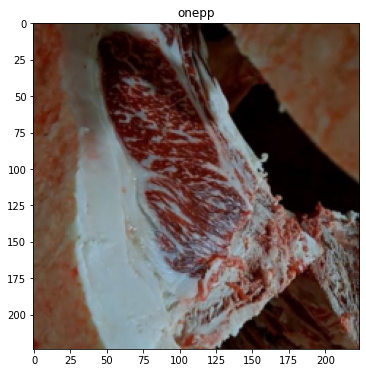

In [6]:
import random
import matplotlib.pyplot as plt

img, label = random.choice(valid_dataset)

img = img.numpy()
img = img.transpose(1,2,0) * np.array((0.229, 0.224, 0.225)) + np.array((0.485, 0.456, 0.406))

fig, ax = plt.subplots(figsize=(6,6))
ax.imshow(img)
plt.title(f'{train_dataset.classes[label]}')
plt.show()

## Model

In [7]:
train_dataset.classes

['one', 'onep', 'onepp', 'two']

In [8]:
import torchvision
import geffnet

device = 'cuda'

model = geffnet.create_model('mobilenetv3_large_100', pretrained=True, num_classes=4)
# model = torchvision.models.resnet18(pretrained=True)
# model.fc = torch.nn.Linear(in_features=512, out_features=5, bias=True)
model.to(device)
print()

=> Discarding pretrained classifier since num_classes != 1000



## Criterion & Optimizer

In [9]:
import torch.optim as optim
from torch.nn import CrossEntropyLoss

lr = 0.00005

criterion = CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=lr)
#lr_scheduler = optim.lr_scheduler.MultiStepLR(optimizer, milestones=[30, 40], gamma=0.1) # change trainer step
lr_scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'max', verbose=True, patience=5) # optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=60, eta_min=0.000001)#

## Train

In [10]:
from trainer import Trainer

num_epoch = 100

trainer = Trainer('save', seed=42)
trainer.train(model, dataloaders, criterion, optimizer, lr_scheduler, num_epoch, patience=10, save_name='mobv3')

Epoch 1/100
----------


100%|██████████| 508/508 [02:01<00:00,  4.18it/s]


train Epoch: 1 Loss: 1.6574 Acc: 0.3538 F1: 0.3541


100%|██████████| 64/64 [00:16<00:00,  3.79it/s]


valid Epoch: 1 Loss: 1.6606 Acc: 0.2572 F1: 0.2408

Epoch 2/100
----------


100%|██████████| 508/508 [02:02<00:00,  4.15it/s]


train Epoch: 2 Loss: 1.2366 Acc: 0.4277 F1: 0.4284


100%|██████████| 64/64 [00:16<00:00,  3.89it/s]


valid Epoch: 2 Loss: 1.4962 Acc: 0.2819 F1: 0.2711

Epoch 3/100
----------


100%|██████████| 508/508 [02:02<00:00,  4.13it/s]


train Epoch: 3 Loss: 1.1504 Acc: 0.4764 F1: 0.4780


100%|██████████| 64/64 [00:17<00:00,  3.75it/s]


valid Epoch: 3 Loss: 1.4135 Acc: 0.3374 F1: 0.3275

Epoch 4/100
----------


100%|██████████| 508/508 [02:02<00:00,  4.16it/s]


train Epoch: 4 Loss: 1.0581 Acc: 0.5311 F1: 0.5324


100%|██████████| 64/64 [00:17<00:00,  3.75it/s]


valid Epoch: 4 Loss: 1.4306 Acc: 0.3801 F1: 0.3611

Epoch 5/100
----------


100%|██████████| 508/508 [02:03<00:00,  4.12it/s]


train Epoch: 5 Loss: 0.9217 Acc: 0.6085 F1: 0.6081


100%|██████████| 64/64 [00:16<00:00,  3.78it/s]


valid Epoch: 5 Loss: 1.3626 Acc: 0.4410 F1: 0.4319

Epoch 6/100
----------


100%|██████████| 508/508 [02:02<00:00,  4.15it/s]


train Epoch: 6 Loss: 0.7483 Acc: 0.6968 F1: 0.6969


100%|██████████| 64/64 [00:16<00:00,  3.77it/s]


valid Epoch: 6 Loss: 1.1646 Acc: 0.5217 F1: 0.5266

Epoch 7/100
----------


100%|██████████| 508/508 [02:03<00:00,  4.12it/s]


train Epoch: 7 Loss: 0.5592 Acc: 0.7822 F1: 0.7816


100%|██████████| 64/64 [00:16<00:00,  3.84it/s]


valid Epoch: 7 Loss: 1.0498 Acc: 0.5923 F1: 0.6023

Epoch 8/100
----------


100%|██████████| 508/508 [02:02<00:00,  4.16it/s]


train Epoch: 8 Loss: 0.4198 Acc: 0.8449 F1: 0.8445


100%|██████████| 64/64 [00:16<00:00,  3.77it/s]


valid Epoch: 8 Loss: 0.9291 Acc: 0.6408 F1: 0.6519

Epoch 9/100
----------


100%|██████████| 508/508 [02:02<00:00,  4.14it/s]


train Epoch: 9 Loss: 0.3035 Acc: 0.8915 F1: 0.8914


100%|██████████| 64/64 [00:16<00:00,  3.77it/s]


valid Epoch: 9 Loss: 0.8486 Acc: 0.6828 F1: 0.6940

Epoch 10/100
----------


100%|██████████| 508/508 [02:03<00:00,  4.11it/s]


train Epoch: 10 Loss: 0.2271 Acc: 0.9207 F1: 0.9207


100%|██████████| 64/64 [00:17<00:00,  3.73it/s]


valid Epoch: 10 Loss: 0.7659 Acc: 0.7257 F1: 0.7336

Epoch 11/100
----------


100%|██████████| 508/508 [02:03<00:00,  4.11it/s]


train Epoch: 11 Loss: 0.1776 Acc: 0.9373 F1: 0.9374


100%|██████████| 64/64 [00:17<00:00,  3.71it/s]


valid Epoch: 11 Loss: 0.7067 Acc: 0.7486 F1: 0.7560

Epoch 12/100
----------


100%|██████████| 508/508 [02:02<00:00,  4.14it/s]


train Epoch: 12 Loss: 0.1426 Acc: 0.9506 F1: 0.9505


100%|██████████| 64/64 [00:17<00:00,  3.67it/s]


valid Epoch: 12 Loss: 0.6918 Acc: 0.7631 F1: 0.7704

Epoch 13/100
----------


100%|██████████| 508/508 [02:03<00:00,  4.13it/s]


train Epoch: 13 Loss: 0.1168 Acc: 0.9602 F1: 0.9603


100%|██████████| 64/64 [00:17<00:00,  3.73it/s]


valid Epoch: 13 Loss: 0.6535 Acc: 0.7801 F1: 0.7855

Epoch 14/100
----------


100%|██████████| 508/508 [02:01<00:00,  4.17it/s]


train Epoch: 14 Loss: 0.0998 Acc: 0.9655 F1: 0.9655


100%|██████████| 64/64 [00:17<00:00,  3.70it/s]


valid Epoch: 14 Loss: 0.6530 Acc: 0.7857 F1: 0.7934

Epoch 15/100
----------


100%|██████████| 508/508 [02:01<00:00,  4.17it/s]


train Epoch: 15 Loss: 0.0845 Acc: 0.9709 F1: 0.9709


100%|██████████| 64/64 [00:16<00:00,  3.80it/s]


valid Epoch: 15 Loss: 0.6126 Acc: 0.8080 F1: 0.8131

Epoch 16/100
----------


100%|██████████| 508/508 [02:01<00:00,  4.17it/s]


train Epoch: 16 Loss: 0.0717 Acc: 0.9748 F1: 0.9748


100%|██████████| 64/64 [00:16<00:00,  3.81it/s]


valid Epoch: 16 Loss: 0.6262 Acc: 0.8006 F1: 0.8027

Epoch 17/100
----------


100%|██████████| 508/508 [02:02<00:00,  4.16it/s]


train Epoch: 17 Loss: 0.0635 Acc: 0.9779 F1: 0.9778


100%|██████████| 64/64 [00:16<00:00,  3.82it/s]


valid Epoch: 17 Loss: 0.6181 Acc: 0.8079 F1: 0.8127

Epoch 18/100
----------


100%|██████████| 508/508 [02:01<00:00,  4.17it/s]


train Epoch: 18 Loss: 0.0548 Acc: 0.9813 F1: 0.9812


100%|██████████| 64/64 [00:16<00:00,  3.78it/s]


valid Epoch: 18 Loss: 0.5732 Acc: 0.8269 F1: 0.8309

Epoch 19/100
----------


100%|██████████| 508/508 [02:02<00:00,  4.16it/s]


train Epoch: 19 Loss: 0.0517 Acc: 0.9824 F1: 0.9824


100%|██████████| 64/64 [00:16<00:00,  3.84it/s]


valid Epoch: 19 Loss: 0.5496 Acc: 0.8339 F1: 0.8368

Epoch 20/100
----------


100%|██████████| 508/508 [02:02<00:00,  4.16it/s]


train Epoch: 20 Loss: 0.0449 Acc: 0.9841 F1: 0.9841


100%|██████████| 64/64 [00:16<00:00,  3.78it/s]


valid Epoch: 20 Loss: 0.5775 Acc: 0.8272 F1: 0.8302

Epoch 21/100
----------


100%|██████████| 508/508 [02:02<00:00,  4.15it/s]


train Epoch: 21 Loss: 0.0385 Acc: 0.9863 F1: 0.9863


100%|██████████| 64/64 [00:16<00:00,  3.79it/s]


valid Epoch: 21 Loss: 0.5859 Acc: 0.8336 F1: 0.8371

Epoch 22/100
----------


100%|██████████| 508/508 [02:01<00:00,  4.18it/s]


train Epoch: 22 Loss: 0.0370 Acc: 0.9867 F1: 0.9867


100%|██████████| 64/64 [00:16<00:00,  3.77it/s]


valid Epoch: 22 Loss: 0.5785 Acc: 0.8326 F1: 0.8366

Epoch 23/100
----------


100%|██████████| 508/508 [02:01<00:00,  4.19it/s]


train Epoch: 23 Loss: 0.0362 Acc: 0.9868 F1: 0.9868


100%|██████████| 64/64 [00:16<00:00,  3.78it/s]


valid Epoch: 23 Loss: 0.5622 Acc: 0.8428 F1: 0.8444

Epoch 24/100
----------


100%|██████████| 508/508 [02:01<00:00,  4.17it/s]


train Epoch: 24 Loss: 0.0340 Acc: 0.9876 F1: 0.9876


100%|██████████| 64/64 [00:17<00:00,  3.70it/s]


valid Epoch: 24 Loss: 0.5653 Acc: 0.8461 F1: 0.8504

Epoch 25/100
----------


100%|██████████| 508/508 [02:02<00:00,  4.16it/s]


train Epoch: 25 Loss: 0.0315 Acc: 0.9886 F1: 0.9886


100%|██████████| 64/64 [00:17<00:00,  3.75it/s]


valid Epoch: 25 Loss: 0.5793 Acc: 0.8457 F1: 0.8490

Epoch 26/100
----------


100%|██████████| 508/508 [02:01<00:00,  4.19it/s]


train Epoch: 26 Loss: 0.0269 Acc: 0.9900 F1: 0.9900


100%|██████████| 64/64 [00:16<00:00,  3.84it/s]


valid Epoch: 26 Loss: 0.5173 Acc: 0.8587 F1: 0.8609

Epoch 27/100
----------


100%|██████████| 508/508 [02:01<00:00,  4.17it/s]


train Epoch: 27 Loss: 0.0250 Acc: 0.9909 F1: 0.9909


100%|██████████| 64/64 [00:16<00:00,  3.85it/s]


valid Epoch: 27 Loss: 0.5606 Acc: 0.8467 F1: 0.8489

Epoch 28/100
----------


100%|██████████| 508/508 [02:02<00:00,  4.16it/s]


train Epoch: 28 Loss: 0.0253 Acc: 0.9912 F1: 0.9912


100%|██████████| 64/64 [00:16<00:00,  3.83it/s]


valid Epoch: 28 Loss: 0.5449 Acc: 0.8565 F1: 0.8594

Epoch 29/100
----------


100%|██████████| 508/508 [02:02<00:00,  4.14it/s]


train Epoch: 29 Loss: 0.0239 Acc: 0.9916 F1: 0.9916


100%|██████████| 64/64 [00:16<00:00,  3.80it/s]


valid Epoch: 29 Loss: 0.4716 Acc: 0.8713 F1: 0.8741

Epoch 30/100
----------


100%|██████████| 508/508 [02:02<00:00,  4.15it/s]


train Epoch: 30 Loss: 0.0224 Acc: 0.9917 F1: 0.9917


100%|██████████| 64/64 [00:17<00:00,  3.71it/s]


valid Epoch: 30 Loss: 0.5698 Acc: 0.8511 F1: 0.8555

Epoch 31/100
----------


100%|██████████| 508/508 [02:02<00:00,  4.16it/s]


train Epoch: 31 Loss: 0.0224 Acc: 0.9913 F1: 0.9913


100%|██████████| 64/64 [00:16<00:00,  3.82it/s]


valid Epoch: 31 Loss: 0.4904 Acc: 0.8683 F1: 0.8716

Epoch 32/100
----------


100%|██████████| 508/508 [02:01<00:00,  4.18it/s]


train Epoch: 32 Loss: 0.0196 Acc: 0.9924 F1: 0.9924


100%|██████████| 64/64 [00:17<00:00,  3.71it/s]


valid Epoch: 32 Loss: 0.5006 Acc: 0.8695 F1: 0.8722

Epoch 33/100
----------


100%|██████████| 508/508 [02:03<00:00,  4.13it/s]


train Epoch: 33 Loss: 0.0188 Acc: 0.9928 F1: 0.9928


100%|██████████| 64/64 [00:17<00:00,  3.76it/s]


valid Epoch: 33 Loss: 0.5090 Acc: 0.8693 F1: 0.8718

Epoch 34/100
----------


100%|██████████| 508/508 [02:02<00:00,  4.15it/s]


train Epoch: 34 Loss: 0.0212 Acc: 0.9917 F1: 0.9917


100%|██████████| 64/64 [00:17<00:00,  3.71it/s]


valid Epoch: 34 Loss: 0.5450 Acc: 0.8627 F1: 0.8657

Epoch 35/100
----------


100%|██████████| 508/508 [02:03<00:00,  4.12it/s]


train Epoch: 35 Loss: 0.0179 Acc: 0.9931 F1: 0.9931


100%|██████████| 64/64 [00:17<00:00,  3.66it/s]


valid Epoch: 35 Loss: 0.5112 Acc: 0.8724 F1: 0.8745

Epoch 36/100
----------


100%|██████████| 508/508 [02:03<00:00,  4.10it/s]


train Epoch: 36 Loss: 0.0168 Acc: 0.9937 F1: 0.9937


100%|██████████| 64/64 [00:17<00:00,  3.65it/s]


valid Epoch: 36 Loss: 0.5141 Acc: 0.8688 F1: 0.8709

Epoch 37/100
----------


100%|██████████| 508/508 [02:03<00:00,  4.11it/s]


train Epoch: 37 Loss: 0.0170 Acc: 0.9935 F1: 0.9935


100%|██████████| 64/64 [00:16<00:00,  3.78it/s]


valid Epoch: 37 Loss: 0.6148 Acc: 0.8582 F1: 0.8611

Epoch 38/100
----------


100%|██████████| 508/508 [02:02<00:00,  4.14it/s]


train Epoch: 38 Loss: 0.0174 Acc: 0.9933 F1: 0.9933


100%|██████████| 64/64 [00:16<00:00,  3.80it/s]


valid Epoch: 38 Loss: 0.5144 Acc: 0.8698 F1: 0.8719

Epoch 39/100
----------


100%|██████████| 508/508 [02:03<00:00,  4.11it/s]


train Epoch: 39 Loss: 0.0164 Acc: 0.9932 F1: 0.9932


100%|██████████| 64/64 [00:16<00:00,  3.79it/s]


valid Epoch: 39 Loss: 0.5078 Acc: 0.8784 F1: 0.8808

Epoch 40/100
----------


100%|██████████| 508/508 [02:04<00:00,  4.07it/s]


train Epoch: 40 Loss: 0.0160 Acc: 0.9933 F1: 0.9933


100%|██████████| 64/64 [00:17<00:00,  3.75it/s]


valid Epoch: 40 Loss: 0.5036 Acc: 0.8757 F1: 0.8794

Epoch 41/100
----------


100%|██████████| 508/508 [02:02<00:00,  4.14it/s]


train Epoch: 41 Loss: 0.0149 Acc: 0.9941 F1: 0.9941


100%|██████████| 64/64 [00:17<00:00,  3.73it/s]


valid Epoch: 41 Loss: 0.5792 Acc: 0.8546 F1: 0.8574

Epoch 42/100
----------


100%|██████████| 508/508 [02:02<00:00,  4.14it/s]


train Epoch: 42 Loss: 0.0146 Acc: 0.9942 F1: 0.9942


100%|██████████| 64/64 [00:16<00:00,  3.81it/s]


valid Epoch: 42 Loss: 0.5640 Acc: 0.8640 F1: 0.8672

Epoch 43/100
----------


100%|██████████| 508/508 [02:01<00:00,  4.17it/s]


train Epoch: 43 Loss: 0.0161 Acc: 0.9933 F1: 0.9933


100%|██████████| 64/64 [00:16<00:00,  3.80it/s]


valid Epoch: 43 Loss: 0.4983 Acc: 0.8781 F1: 0.8790

Epoch 44/100
----------


100%|██████████| 508/508 [02:02<00:00,  4.16it/s]


train Epoch: 44 Loss: 0.0118 Acc: 0.9951 F1: 0.9951


100%|██████████| 64/64 [00:17<00:00,  3.73it/s]


valid Epoch: 44 Loss: 0.5516 Acc: 0.8678 F1: 0.8714

Epoch 45/100
----------


100%|██████████| 508/508 [02:02<00:00,  4.15it/s]


train Epoch: 45 Loss: 0.0143 Acc: 0.9942 F1: 0.9943


100%|██████████| 64/64 [00:17<00:00,  3.73it/s]


valid Epoch: 45 Loss: 0.6767 Acc: 0.8527 F1: 0.8551
Epoch    45: reducing learning rate of group 0 to 5.0000e-06.

Epoch 46/100
----------


100%|██████████| 508/508 [02:02<00:00,  4.14it/s]


train Epoch: 46 Loss: 0.0095 Acc: 0.9959 F1: 0.9959


100%|██████████| 64/64 [00:16<00:00,  3.85it/s]


valid Epoch: 46 Loss: 0.5381 Acc: 0.8751 F1: 0.8779

Epoch 47/100
----------


100%|██████████| 508/508 [02:02<00:00,  4.15it/s]


train Epoch: 47 Loss: 0.0088 Acc: 0.9962 F1: 0.9962


100%|██████████| 64/64 [00:16<00:00,  3.81it/s]


valid Epoch: 47 Loss: 0.5204 Acc: 0.8764 F1: 0.8797

Epoch 48/100
----------


100%|██████████| 508/508 [02:01<00:00,  4.18it/s]


train Epoch: 48 Loss: 0.0080 Acc: 0.9964 F1: 0.9964


100%|██████████| 64/64 [00:16<00:00,  3.78it/s]


valid Epoch: 48 Loss: 0.5229 Acc: 0.8754 F1: 0.8783

Epoch 49/100
----------


100%|██████████| 508/508 [02:02<00:00,  4.15it/s]


train Epoch: 49 Loss: 0.0076 Acc: 0.9966 F1: 0.9966


100%|██████████| 64/64 [00:16<00:00,  3.83it/s]


valid Epoch: 49 Loss: 0.4942 Acc: 0.8813 F1: 0.8846

Epoch 50/100
----------


100%|██████████| 508/508 [02:02<00:00,  4.15it/s]


train Epoch: 50 Loss: 0.0069 Acc: 0.9969 F1: 0.9969


100%|██████████| 64/64 [00:16<00:00,  3.78it/s]


valid Epoch: 50 Loss: 0.4614 Acc: 0.8883 F1: 0.8911

Epoch 51/100
----------


100%|██████████| 508/508 [02:02<00:00,  4.16it/s]


train Epoch: 51 Loss: 0.0072 Acc: 0.9968 F1: 0.9968


100%|██████████| 64/64 [00:16<00:00,  3.88it/s]


valid Epoch: 51 Loss: 0.4427 Acc: 0.8925 F1: 0.8948

Epoch 52/100
----------


100%|██████████| 508/508 [02:02<00:00,  4.15it/s]


train Epoch: 52 Loss: 0.0072 Acc: 0.9966 F1: 0.9966


100%|██████████| 64/64 [00:16<00:00,  3.83it/s]


valid Epoch: 52 Loss: 0.4664 Acc: 0.8892 F1: 0.8915

Epoch 53/100
----------


100%|██████████| 508/508 [02:02<00:00,  4.15it/s]


train Epoch: 53 Loss: 0.0066 Acc: 0.9970 F1: 0.9970


100%|██████████| 64/64 [00:16<00:00,  3.82it/s]


valid Epoch: 53 Loss: 0.4266 Acc: 0.8983 F1: 0.9002

Epoch 54/100
----------


100%|██████████| 508/508 [02:01<00:00,  4.17it/s]


train Epoch: 54 Loss: 0.0067 Acc: 0.9968 F1: 0.9968


100%|██████████| 64/64 [00:17<00:00,  3.71it/s]


valid Epoch: 54 Loss: 0.4508 Acc: 0.8899 F1: 0.8927

Epoch 55/100
----------


100%|██████████| 508/508 [02:06<00:00,  4.02it/s]


train Epoch: 55 Loss: 0.0062 Acc: 0.9971 F1: 0.9971


100%|██████████| 64/64 [00:17<00:00,  3.76it/s]


valid Epoch: 55 Loss: 0.4448 Acc: 0.8940 F1: 0.8963

Epoch 56/100
----------


100%|██████████| 508/508 [02:04<00:00,  4.07it/s]


train Epoch: 56 Loss: 0.0065 Acc: 0.9969 F1: 0.9969


100%|██████████| 64/64 [00:17<00:00,  3.62it/s]


valid Epoch: 56 Loss: 0.4665 Acc: 0.8882 F1: 0.8908

Epoch 57/100
----------


100%|██████████| 508/508 [02:04<00:00,  4.08it/s]


train Epoch: 57 Loss: 0.0057 Acc: 0.9974 F1: 0.9974


100%|██████████| 64/64 [00:17<00:00,  3.73it/s]


valid Epoch: 57 Loss: 0.4589 Acc: 0.8918 F1: 0.8940

Epoch 58/100
----------


100%|██████████| 508/508 [02:04<00:00,  4.08it/s]


train Epoch: 58 Loss: 0.0059 Acc: 0.9972 F1: 0.9972


100%|██████████| 64/64 [00:16<00:00,  3.78it/s]


valid Epoch: 58 Loss: 0.4413 Acc: 0.8939 F1: 0.8963

Epoch 59/100
----------


100%|██████████| 508/508 [02:04<00:00,  4.08it/s]


train Epoch: 59 Loss: 0.0054 Acc: 0.9979 F1: 0.9979


100%|██████████| 64/64 [00:17<00:00,  3.70it/s]


valid Epoch: 59 Loss: 0.4318 Acc: 0.8955 F1: 0.8972
Epoch    59: reducing learning rate of group 0 to 5.0000e-07.

Epoch 60/100
----------


100%|██████████| 508/508 [02:03<00:00,  4.11it/s]


train Epoch: 60 Loss: 0.0060 Acc: 0.9970 F1: 0.9970


100%|██████████| 64/64 [00:17<00:00,  3.76it/s]


valid Epoch: 60 Loss: 0.4387 Acc: 0.8940 F1: 0.8957

Epoch 61/100
----------


100%|██████████| 508/508 [02:04<00:00,  4.09it/s]


train Epoch: 61 Loss: 0.0058 Acc: 0.9974 F1: 0.9974


100%|██████████| 64/64 [00:17<00:00,  3.71it/s]


valid Epoch: 61 Loss: 0.4452 Acc: 0.8936 F1: 0.8955

Epoch 62/100
----------


100%|██████████| 508/508 [02:03<00:00,  4.10it/s]


train Epoch: 62 Loss: 0.0057 Acc: 0.9975 F1: 0.9975


100%|██████████| 64/64 [00:17<00:00,  3.70it/s]


valid Epoch: 62 Loss: 0.4547 Acc: 0.8920 F1: 0.8942

Epoch 63/100
----------


100%|██████████| 508/508 [02:04<00:00,  4.08it/s]


train Epoch: 63 Loss: 0.0054 Acc: 0.9974 F1: 0.9974


100%|██████████| 64/64 [00:16<00:00,  3.83it/s]


valid Epoch: 63 Loss: 0.4563 Acc: 0.8904 F1: 0.8923

Epoch 64/100
----------


100%|██████████| 508/508 [02:03<00:00,  4.11it/s]


train Epoch: 64 Loss: 0.0055 Acc: 0.9977 F1: 0.9977


100%|██████████| 64/64 [00:16<00:00,  3.77it/s]


valid Epoch: 64 Loss: 0.4642 Acc: 0.8901 F1: 0.8919

Training complete!
Best f1 score 0.9002 at epoch 53

